Inserting necessary libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, log_loss

Inserting the dataset:

In [3]:
df= pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking for null values:

In [4]:
null_elements = df.isnull().sum().sum()
print("Number of null elements:", null_elements)

Number of null elements: 0


Normalizing the data:

In [5]:
numerical_cols = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction","Age"]
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [6]:
print(df.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI   
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745  \
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667        0  
2                  0.253629  0.183333        1  
3                  0.038002  0.000000        0  
4                  0.943638  0.200000        1  


Plotting features to derive an assumption:

<Axes: xlabel='Pregnancies', ylabel='count'>

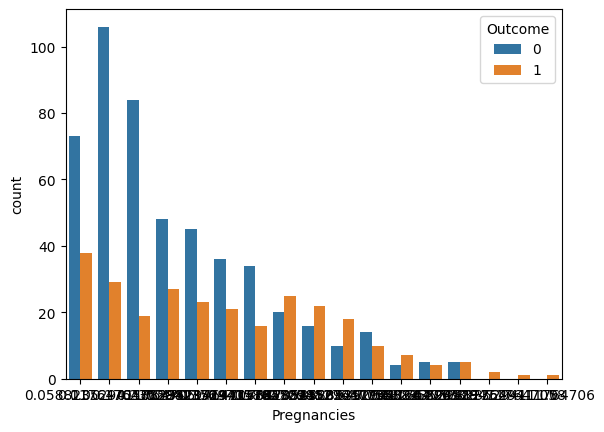

In [16]:
sns.countplot(x='Pregnancies',data=df,hue='Outcome')

<Axes: xlabel='Age', ylabel='count'>

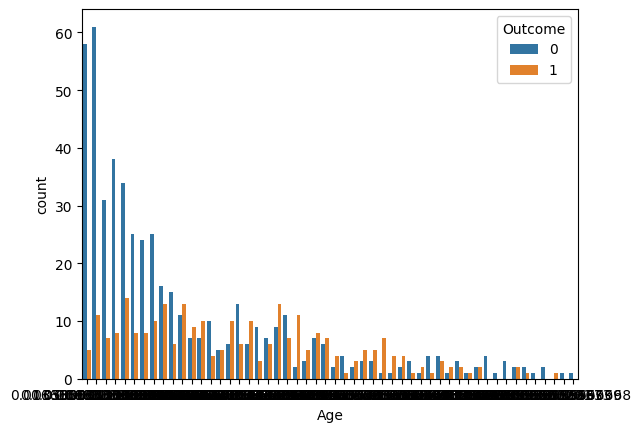

In [17]:
sns.countplot(x='Age',data=df,hue='Outcome')

<Axes: xlabel='BloodPressure', ylabel='count'>

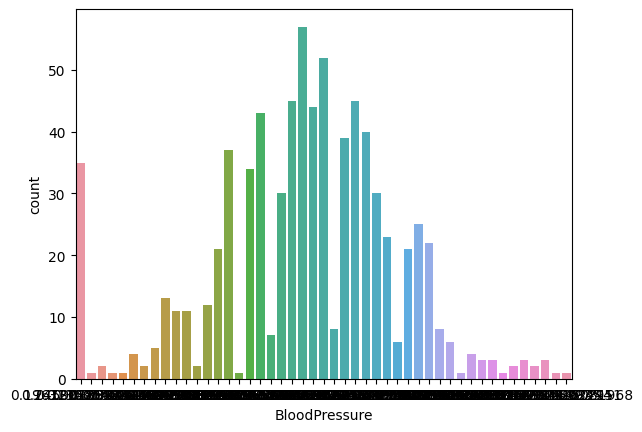

In [18]:
sns.countplot(x='BloodPressure',data=df)

Fitting the dataset into the model:

In [7]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [32]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [33]:
train_loss = log_loss(y_train, y_pred_train)
test_loss = log_loss(y_test, y_pred_test)

The accuracy score:

In [34]:
print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Train log loss:", train_loss)
print("Test log loss:", test_loss)

Train accuracy: 0.7543478260869565
Test accuracy: 0.7727272727272727
Train log loss: 8.854201810804865
Test log loss: 8.191739406617536


Using max_iter hyperparameter change to see difference in the accuracy:

In [39]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='none',max_iter=100),
    LogisticRegression(solver='lbfgs',penalty='none',max_iter=200),
    LogisticRegression(solver='sag',penalty='none',max_iter=500),
    LogisticRegression(solver='saga',penalty='none',max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test, predicted),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

C:\Users\HP\AppData\Local\R-MINI~1\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\HP\AppData\Local\R-MINI~1\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\HP\AppData\Local\R-MINI~1\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\HP\AppData\Local\R-MINI~1\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


,Train Accuracy,Test Accuracy,Precision
0,0.76739,0.75974,0.63462
1,0.76739,0.75974,0.63462
2,0.76739,0.75974,0.63462
3,0.76739,0.75974,0.63462


Using C hyperparameter change to see difference in the accuracy:

In [40]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2', C=1),
    LogisticRegression(solver='lbfgs',penalty='l2',C=2.5),
    LogisticRegression(solver='sag',penalty='l2',C=5),
    LogisticRegression(solver='saga',penalty='l2',C=10)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Test Accuracy,Precission
0,0.75435,0.77273,0.68605
1,0.76304,0.76948,0.66667
2,0.76957,0.75974,0.64286
3,0.77174,0.75649,0.63366


Using tol hyperparameter change to see difference in the accuracy:

In [41]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2', tol=0.0001),
    LogisticRegression(solver='lbfgs',penalty='l2', tol=0.1),
    LogisticRegression(solver='sag',penalty='l2', tol=1),
    LogisticRegression(solver='saga',penalty='l2', tol=10)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

,Train Accuracy,Test Accuracy,Precission
0,0.75435,0.77273,0.68605
1,0.75217,0.77273,0.68605
3,0.73478,0.74026,0.62500
2,0.70652,0.70779,0.64286
